In [127]:
# Bibliotecas necesarias para desarrollar el problema
import sympy as smp
import numpy as np
import matplotlib.pyplot as plt
from sympy import Derivative
from lagrange_a_hamilton import cambio_L_H

# Sistema de referencia

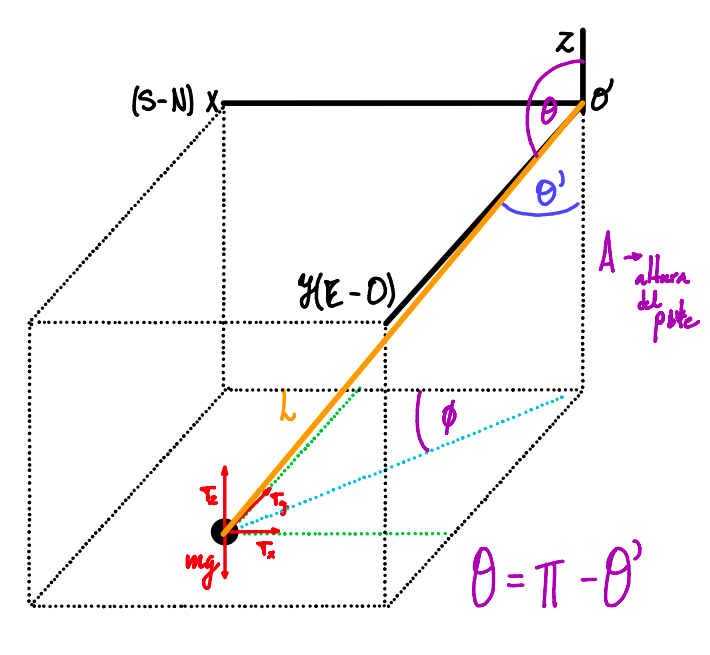                        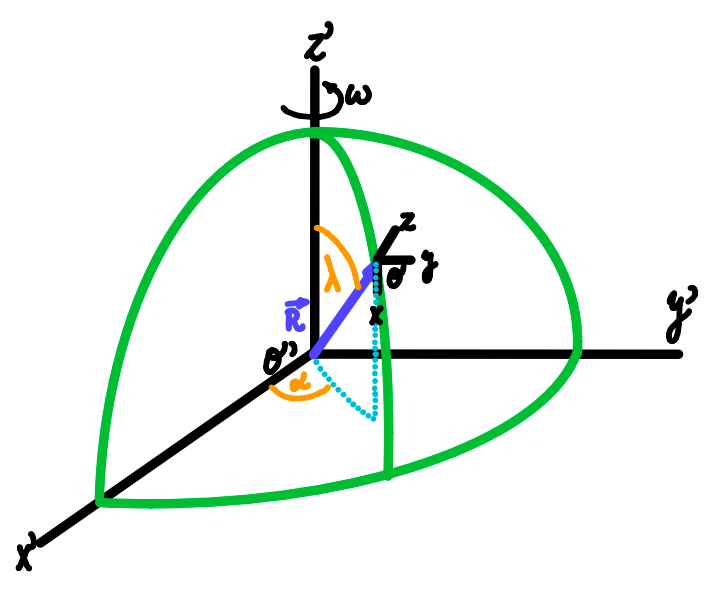



# Designacion de las constantes y varibles dinamicas del sistema

In [128]:
omega, m, g, L, A , ladmda, R_T , k , a , c_w , p , eta = smp.symbols(r"\omega , m , g, L , A , \lambda , R_{Tierra}, k , a, c_w , \rho_{aire}, \eta_{aire}")

# omega: velocidad de rotacion de la Tierra
# m:  masa del pendulo
# g: constante de gravitacional
# L: Longitud natural de la barra
# A: Altura del pivote del pendulo
# ladmda: Colatitud 
# R_T: Radio terrestre
# k : Constante de resorte de la barra semirigida
# a : Radio de la esfera del pendulo
# c_w: Coeficiente de resistencia cuadratica
# p: Densidad del aire
# eta: Viscosidad del aire

alpha = smp.Rational(3,2)*smp.pi*a*eta
beta = smp.Rational(1,2)*c_w*a**2 *p

# Variables dinamicas

from sympy.physics.mechanics import dynamicsymbols , init_vprinting # Se utilizan estas funciones para tener notacion de Newton para las derivadas temporales y se generan 
                                                                    # las funciones con dependencia implicita a t

init_vprinting()

t = smp.Symbol("t", positive = True) # Tiempo
r , theta , phi = dynamicsymbols(r"r , \theta , \phi") 


# Cabe destacar que por el sistema de referencia utilizado, theta va a ser cambiado segun la transformacion: theta = pi - theta' 
# Donde sera theta' la variable dinamica que se utilizara al final

En el sistema de referencia no inercial (Imagen de la izquierda), la segunda ley de Newton corresponde a:

\begin{align*}
    \sum \vec{F} = m \ddot{\vec{r}} \Rightarrow \vec{w} - \alpha \dot{\vec{r}} - \beta \left| \dot{\vec{r}} \right| \dot{\vec{r}} - k (\vec{r} - \vec{L}) - 2 m \vec{w} \times \dot{\vec{r}} - m \vec{w} \times \left[ \vec{w} \times (\vec{r} + \vec{R}) \right] = m \ddot{r}
\end{align*}

Con: 

$\bullet$ Fuerzas, otros vectores y constantes del sistema:

\begin{align*}
    \vec{w} = -mg \hat{k}  \; \; \;\; & \;\;\;\;\; \vec{R} = \left(R_{Tierra} + A\right)\hat{k}  &  \alpha = \frac{3 \pi a \eta_{aire}}{2} \;\;\;\; & \;\;\;\; \beta = \frac{c_{w} \pi a^{2} \rho_{aire}}{2}   \; \; \;\; & \;\;\;\;\; \vec{L} = L  \hat{e_r}
\end{align*}

No obstante, se va a utilizar el Lagrangiano del sistema como paso intermedio de la Mecánica Hamiltoneana, con el objetivo de obtener un sistema de ecuaciones diferenciales de primer orden. Cabe destacar, que la mecánica Lagrangiana ni la Hamiltoneana consideran fuerzas no conservativas de forma natural, porque que será necesario construir estas fuerzas como fuerzas generalizadas y hacer la introducción de estas.

$\bullet$ Lagrangiano del sistema:
\begin{equation*}
    L = T - V 
    = \frac{1}{2}m \dot{\vec{r}}^2 - mg\vec{r}\cdot \hat{k} -  \frac{1}{2} k (\vec{r} -\vec{L})^2
\end{equation*}

$\bullet$ Fuerzas generalizadas:
\begin{equation*}
    Q_j =\vec{F} \cdot \frac{\partial \vec{r}}{\partial q_j}
\end{equation*}

donde $\vec{F}$ serían todas las fuerzas no conservativas del sistema

$\bullet$ Posición en coordenadas esféricas del marco no inercial:
\begin{equation*}
    \vec{r'} = r' \hat{e_r}
\end{equation*}

$\bullet$ Velocidad en coordenadas esféricas del marco no inercial:
\begin{equation*}
    \dot{\vec{r'}} = \dot{r'} \hat{e_r} + r' \dot{\theta} \hat{e_\theta} + r' \dot{\phi} sin\left(\theta\right) \hat{e_\phi}
\end{equation*}

$\bullet$ Velocidad angular de la Tierra en el marco de referencia de la Figura de la derecha:
\begin{equation*}
    \vec{\omega} = \omega cos \left(\lambda\right) \hat{k} - \omega sin \left(\lambda\right) \hat{i}
\end{equation*}

$\bullet$ Relación de la derivada temporal entre marcos de referencia inerciales y no inerciales:

\begin{equation*}
    \frac{d}{dt}\vec{A} _{fijo} = \frac{d}{dt}\vec{A} _{rot} + \vec{\Omega} \times \vec{A}
\end{equation*}

$\bullet$ Matriz de transformación de coordenadas cartesianas a esféricas:
\begin{equation*}
    S = \begin{pmatrix}
        sin\left(\theta\right) cos\left(\phi\right) & sin\left(\theta\right) sin\left(\phi\right) & cos \left(\theta\right)\\ 
        cos\left(\theta\right) cos\left(\phi\right) & cos\left(\theta\right) sin\left(\phi\right) & -sin\left(\theta\right)\\ 
        -sin\left(\phi\right) & cos\left(\phi\right) & 0
        \end{pmatrix}
\end{equation*}

# Definiendo el sistema

Se va a utilizar un sistema matricial de vectores manteniendo siempre un orden:

Cartesianas -> ($\hat{i}$ , $\hat{j}$ , $\hat{k}$) \
Esfericas -> ($\hat{e}_r$ ,  $\hat{e}_\theta$ ,  $\hat{e}_\phi$) 

In [129]:
# Vectores en cartesianas

R = smp.Matrix([0,0,R_T + A]) # Vector posicion para el pivote del pendulo
wp = smp.Matrix([0,0,-m*g]) # Vector peso
wr = smp.Matrix([-omega*smp.sin(ladmda),0,omega*smp.cos(ladmda)]) # Vector velocidad de rotacion terrestre

# Matriz de transformacion de cartesianas a esfericas

S = smp.Matrix(([smp.sin(theta)*smp.cos(phi), smp.sin(theta)*smp.sin(phi), smp.cos(theta)],
                [smp.cos(theta)*smp.cos(phi), smp.cos(theta)*smp.sin(phi), -1*smp.sin(theta)],
                [-1*smp.sin(phi), smp.cos(phi),0]))

# Transformando los vectores de a coordenadas esfericas

R = S*R
wp = S*wp
wr = S*wr # Los vectores fueron transformados y su version en cartesianas se perdio

# Vector longitud natural

vL = smp.Matrix([L,0,0])

# Ahora, escribiendo los vectores que ya se establecieron en coordenadas esfericas (posicion , velocidad y aceleracion)

vr = smp.Matrix([r,0,0])

# Derivadas temporales (primera y segunda) de las coordenadas

dr = smp.diff(r)
ddr = smp.diff(dr)

dtheta = smp.diff(theta)
ddtheta = smp.diff(dtheta)

dphi = smp.diff(phi)
ddphi = smp.diff(dphi)


dvr = smp.Matrix([dr , r*dtheta , r*dphi*smp.sin(theta)]) # Velocidad



Aplicando la relación de la derivada temporal entre marcos de referencia inerciales y no inerciales para el vector posición del péndulo


\begin{align*}
    \vec{r} &= \vec{R} + \vec{ r'} \\
    \dot{\vec{r}}_{fijo} &= \dot{\vec{R}}_{fijo} + \dot{\vec{ r'}}_{fijo} \\
                  &= \dot{\vec{R}}_{fijo} + \dot{\vec{r'}}_{rot}+ \vec{\omega} \times \vec{ r'}
\end{align*}

Con el resultado de lo anterior, buscando la energía cinética

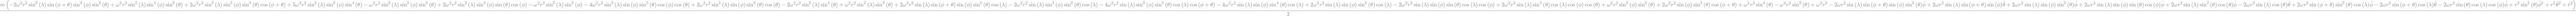

In [130]:
vec_rp = smp.Matrix([r*smp.sin(theta)*smp.cos(phi),r*smp.sin(theta)*smp.sin(phi), r*smp.cos(theta)])

vec_v = smp.diff(R,t) + smp.diff(vec_rp) +wr.cross(vec_rp)

velocidad_c = vec_v.dot(vec_v).expand()
velocidad_c = velocidad_c.simplify()


T = smp.Rational(1,2)*m*velocidad_c
T

La energía potencial

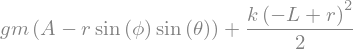

In [131]:
V = m*g*(A-r*smp.sin(theta)*smp.sin(phi)) + smp.Rational(1,2)*k*(r-L)**2
V

El Lagrangiano y el Hamiltoneano

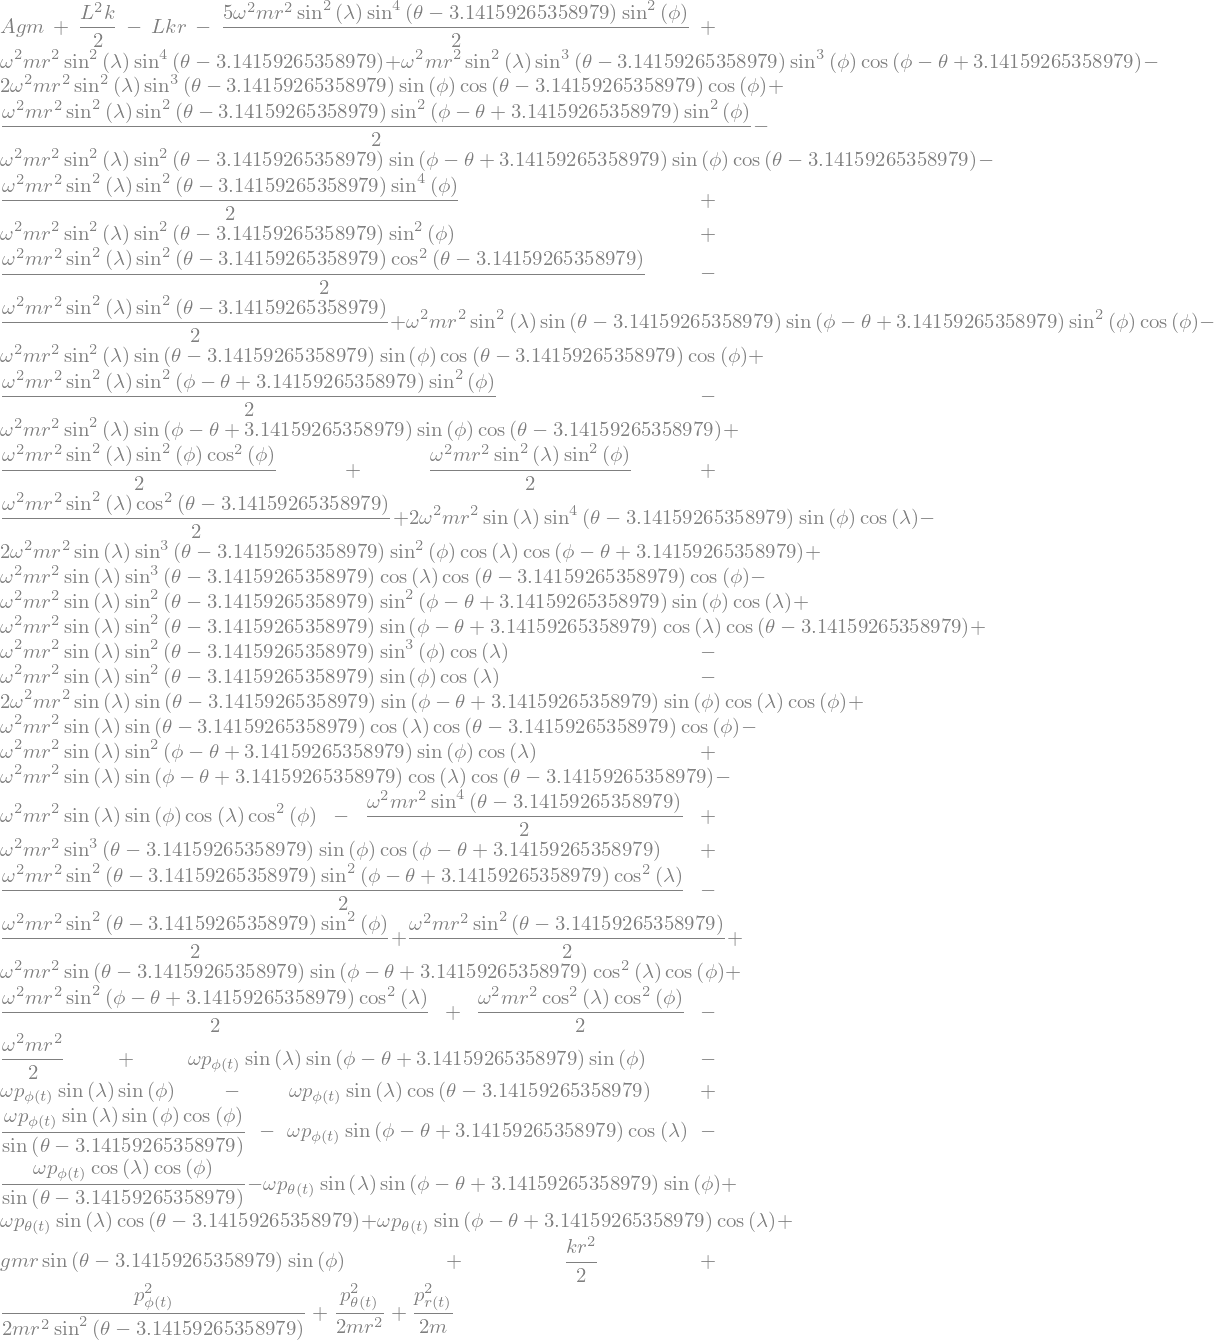

In [132]:
LL = T - V
cg = [r,theta,phi]
H , sp , p_cg = cambio_L_H(LL, cg)
H = H.subs([(theta, np.pi-theta)])
H

Se hizo el cambio de coordenadas: $\theta = \pi - \theta'$ 

Por simplicidad, se va a mantener el $\theta$ como variable siempre y se recuerda que este cambio afecta la posicion angular, velocidad y aceleracion para dicha coordenada

# Ecuaciones del moviento

In [133]:
pr , ptheta , pphi = sp

dpr = -1*smp.diff(H,r)
dr = smp.diff(H,pr)

dptheta = -1*smp.diff(H,theta)
dtheta = smp.diff(H,ptheta)

dpphi = -1*smp.diff(H,phi)
dphi = smp.diff(H,pphi)

## Ecuaciones diferenciales despejadas para cada coordenada

# Conversión de ecuaciones simbólicas a ecuaciones numéricas

In [134]:
# m,ladmda,omega,A,R_T,L,g , t,r,pr,theta,ptheta,phi,pphi

dpr_n = smp.lambdify([m,ladmda,omega,A,R_T,L,g , t,r,pr,theta,ptheta,phi,pphi], dpr, 'numpy')
dr_n = smp.lambdify([m,ladmda,omega,A,R_T,L,g , t,r,pr,theta,ptheta,phi,pphi], dr, 'numpy')

dptheta_n = smp.lambdify([m,ladmda,omega,A,R_T,L,g , t,r,pr,theta,ptheta,phi,pphi], dptheta, 'numpy')
dtheta_n = smp.lambdify([m,ladmda,omega,A,R_T,L,g , t,r,pr,theta,ptheta,phi,pphi], dtheta, 'numpy')

dpphi_n = smp.lambdify([m,ladmda,omega,A,R_T,L,g , t,r,pr,theta,ptheta,phi,pphi], dpphi, 'numpy')
dphi_n = smp.lambdify([m,ladmda,omega,A,R_T,L,g , t,r,pr,theta,ptheta,phi,pphi], dphi, 'numpy')

# A partir de aqui se resuelven las ecuaciones con los algoritmos presenten en scipy

## Se genera la función auxiliar para resolver el sistema de ecuaciones diferenciales

In [135]:
def dSdt(t,S, m, lamdba, omega, A, R_T, L, g):
    [r_n,
    pr_n, 
    theta_n,
    ptheta_n, 
    phi_n,
    pphi_n] = S
    return [dr_n(m,ladmda,omega,A,R_T,L,g , t,r_n,pr_n,theta_n,ptheta_n,phi_n,pphi_n),
            dpr_n(m,ladmda,omega,A,R_T,L,g , t,r_n,pr_n,theta_n,ptheta_n,phi_n,pphi_n), 
            dtheta_n(m,ladmda,omega,A,R_T,L,g , t,r_n,pr_n,theta_n,ptheta_n,phi_n,pphi_n),
            dptheta_n(m,ladmda,omega,A,R_T,L,g , t,r_n,pr_n,theta_n,ptheta_n,phi_n,pphi_n) , 
            dphi_n(m,ladmda,omega,A,R_T,L,g , t,r_n,pr_n,theta_n,ptheta_n,phi_n,pphi_n),
            dpphi_n(m,ladmda,omega,A,R_T,L,g , t,r_n,pr_n,theta_n,ptheta_n,phi_n,pphi_n)]

# Definición de las condiciones iniciales y las demás constantes del sistema

In [136]:
omega_n = 7.27e-5
m_n = 1000
g_n = 9.80665
L_n = 10
A_n = 20
lamdba_n = -0.1807
R_T_n = 6.37e6
k_n = 1
a_n = 1
cw_n = 0.2
p_n = 1.225
eta_n = 18.6e-6



r0 = 10
theta0 = np.pi/5
phi0 = 0.0
vr0 = 0.0
vtheta0 = 0.0
vphi0 = 0.0

condiciones_iniciales = [r0,vr0, theta0,vtheta0 , phi0 ,vphi0]
extra_arg = (m_n,lamdba_n,omega_n,A_n,R_T_n,L_n,g_n)

# Resolución del sistema

In [137]:
def dSdt(t_n,S, m_n, lamdba_n, omega_n, A_n, R_T_n, L_n, g_n):
    [r_n,
    pr_n, 
    theta_n,
    ptheta_n, 
    phi_n,
    pphi_n] = S
    return [dr_n(m_n,lamdba_n,omega_n,A_n,R_T_n,L_n,g_n , t_n,r_n,pr_n,theta_n,ptheta_n,phi_n,pphi_n),
            dpr_n(m_n,lamdba_n,omega_n,A_n,R_T_n,L_n,g_n , t_n,r_n,pr_n,theta_n,ptheta_n,phi_n,pphi_n), 
            dtheta_n(m_n,lamdba_n,omega_n,A_n,R_T_n,L_n,g_n , t_n,r_n,pr_n,theta_n,ptheta_n,phi_n,pphi_n),
            dptheta_n(m_n,lamdba_n,omega_n,A_n,R_T_n,L_n,g_n , t_n,r_n,pr_n,theta_n,ptheta_n,phi_n,pphi_n) , 
            dphi_n(m_n,lamdba_n,omega_n,A_n,R_T_n,L_n,g_n , t_n,r_n,pr_n,theta_n,ptheta_n,phi_n,pphi_n),
            dpphi_n(m_n,lamdba_n,omega_n,A_n,R_T_n,L_n,g_n , t_n,r_n,pr_n,theta_n,ptheta_n,phi_n,pphi_n)]

omega_n = 7.27e-5
m_n = 1000
g_n = 9.80665
L_n = 10
A_n = 20
lamdba_n = -0.1807
R_T_n = 6.37e6
k_n = 1
a_n = 1
cw_n = 0.2
p_n = 1.225
eta_n = 18.6e-6



r0 = 10
theta0 = np.pi/5
phi0 = 0.0
vr0 = 0.0
vtheta0 = 0.0
vphi0 = 0.0

condiciones_iniciales = [r0,vr0, theta0,vtheta0 , phi0 ,vphi0]
extra_arg = (m_n,lamdba_n,omega_n,A_n,R_T_n,L_n,g_n)


from scipy.integrate import solve_ivp

sol = solve_ivp(dSdt,(0,1000),y0 = condiciones_iniciales , args= extra_arg)

TypeError: Cannot convert expression to float

In [138]:
# Convertir las ecuaciones a funciones numéricas
dpr_n = smp.lambdify([m, ladmda, omega, A, R_T, L, g, t, r, pr, theta, ptheta, phi, pphi], dpr, 'scipy', dummify = True,cse = True)
dr_n = smp.lambdify([m, ladmda, omega, A, R_T, L, g, t, r, pr, theta, ptheta, phi, pphi], dr, 'scipy', dummify = True,cse = True)
dptheta_n = smp.lambdify([m, ladmda, omega, A, R_T, L, g, t, r, pr, theta, ptheta, phi, pphi], dptheta, 'scipy', dummify = True,cse = True)
dtheta_n = smp.lambdify([m, ladmda, omega, A, R_T, L, g, t, r, pr, theta, ptheta, phi, pphi], dtheta, 'scipy', dummify = True,cse = True)
dpphi_n = smp.lambdify([m, ladmda, omega, A, R_T, L, g, t, r, pr, theta, ptheta, phi, pphi], dpphi, 'scipy', dummify = True,cse = True)
dphi_n = smp.lambdify([m, ladmda, omega, A, R_T, L, g, t, r, pr, theta, ptheta, phi, pphi], dphi, 'scipy', dummify = True,cse = True)

def dSdt(t_n, S, m_n, lamdba_n, omega_n, A_n, R_T_n, L_n, g_n):
    r_n, pr_n, theta_n, ptheta_n, phi_n, pphi_n = S
    return [
        dr_n(m_n, lamdba_n, omega_n, A_n, R_T_n, L_n, g_n, t_n, r_n, pr_n, theta_n, ptheta_n, phi_n, pphi_n),
        dpr_n(m_n, lamdba_n, omega_n, A_n, R_T_n, L_n, g_n, t_n, r_n, pr_n, theta_n, ptheta_n, phi_n, pphi_n),
        dtheta_n(m_n, lamdba_n, omega_n, A_n, R_T_n, L_n, g_n, t_n, r_n, pr_n, theta_n, ptheta_n, phi_n, pphi_n),
        dptheta_n(m_n, lamdba_n, omega_n, A_n, R_T_n, L_n, g_n, t_n, r_n, pr_n, theta_n, ptheta_n, phi_n, pphi_n),
        dphi_n(m_n, lamdba_n, omega_n, A_n, R_T_n, L_n, g_n, t_n, r_n, pr_n, theta_n, ptheta_n, phi_n, pphi_n),
        dpphi_n(m_n, lamdba_n, omega_n, A_n, R_T_n, L_n, g_n, t_n, r_n, pr_n, theta_n, ptheta_n, phi_n, pphi_n)
    ]

# Parámetros numéricos
omega_n = 7.27e-5
m_n = 1000.0
g_n = 9.80665
L_n = 10.0
A_n = 20.0
lamdba_n = -0.1807
R_T_n = 6.37e6
k_n = 1.0
a_n = 1.0
cw_n = 0.2
p_n = 1.225
eta_n = 18.6e-6

# Condiciones iniciales
r0 = 10
theta0 = np.pi / 5
phi0 = 0.0
vr0 = 0.0
vtheta0 = 0.0
vphi0 = 0.0
condiciones_iniciales = [r0, vr0, theta0, vtheta0, phi0, vphi0]

# Argumentos extra
extra_arg = (m_n, lamdba_n, omega_n, A_n, R_T_n, L_n, g_n)

# Resolver el sistema de ecuaciones
sol = solve_ivp(fun = dSdt, t_span=(0.0, 1000.0), y0=condiciones_iniciales, args=extra_arg)

# Mostrar los resultados
print(sol.t)
print(sol.y)

TypeError: Cannot convert expression to float

In [139]:
# Verifica que cada función de derivadas devuelva un número
print(dr_n(m_n, lamdba_n, omega_n, A_n, R_T_n, L_n, g_n, 0, r0, vr0, theta0, 0, phi0, 0))
print(dpr_n(m_n, lamdba_n, omega_n, A_n, R_T_n, L_n, g_n, 0, r0, vr0, theta0, 0, phi0, 0))
print(dtheta_n(m_n, lamdba_n, omega_n, A_n, R_T_n, L_n, g_n, 0, r0, vr0, theta0, 0, phi0, 0))
print(dptheta_n(m_n, lamdba_n, omega_n, A_n, R_T_n, L_n, g_n, 0, r0, vr0, theta0, 0, phi0, 0))
print(dphi_n(m_n, lamdba_n, omega_n, A_n, R_T_n, L_n, g_n, 0, r0, vr0, theta0, 0, phi0, 0))
print(dpphi_n(m_n, lamdba_n, omega_n, A_n, R_T_n, L_n, g_n, 0, r0, vr0, theta0, 0, phi0, 0))

0.0
8.47032947254300e-21
5.2606454568104834e-05
0.0
6.906435607028776e-05
57642.042443940045


In [120]:
dr_n(m_n, lamdba_n, omega_n, A_n, R_T_n, L_n, g_n, 0, r0, 1, 1, 1, 1, 1)

# Invirtiendo la matriz de trasformación para pasar la solución de nuevo  a cartesianas

In [35]:
S_1 = S.T.subs([(theta, smp.pi - theta)])
S_1_n = smp.lambdify([theta,phi],S_1)

x = rr*np.sin(ttheta)*np.cos(pphi)
y = -rr*np.sin(pphi)*np.sin(ttheta)
z = -rr*np.cos(pphi)

NameError: name 'rr' is not defined

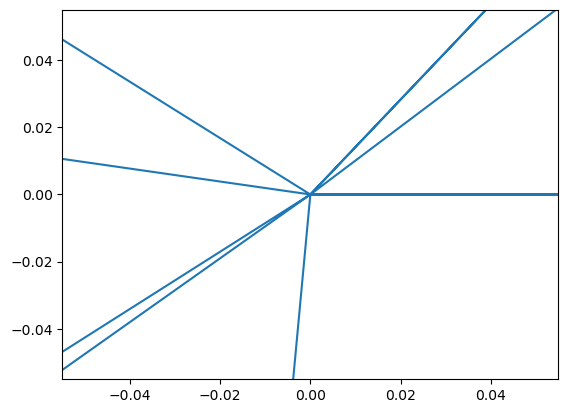

In [24]:
from matplotlib.animation import FuncAnimation


# Configurar la figura y los ejes
fig, ax = plt.subplots()
line, = ax.plot([], [])  # Inicializar la gráfica vacía

# Establecer los límites del gráfico (opcional, según los datos)


# Función de inicialización para configurar la línea vacía al principio
def init():
    line.set_data([], [])
    return line,

# Función de actualización para la animación
def update(frame):
    x_values = x[frame]  # Actualiza los valores de x para ese frame
    y_values = y[frame]  # Actualiza los valores de y para ese frame
    line.set_data(x, y)  # Asigna los nuevos datos a la línea
    return line,

# Configurar la animación: 100 frames, intervalo de 50ms entre frames
ani = FuncAnimation(fig, update, frames=len(x), init_func=init, blit=True, interval=50)

# Guardar la animación como archivo .mp4
ani.save('animacion.mp4', writer='ffmpeg', fps=20)